In [1]:
import os
import sys
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.utils import Dataset
from mrcnn import visualize
import pandas as pd

/home/bartosz/.pyenv/versions/3.7.2/envs/kaggle.open-images/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bartosz/.pyenv/versions/3.7.2/envs/kaggle.open-images/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bartosz/.pyenv/versions/3.7.2/envs/kaggle.open-images/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtyp

In [2]:
import numpy as np

In [3]:
import skimage

In [4]:
from openimages import OpenImageDataset

In [5]:
PATH = '/home/bartosz/repos/projects/kaggle/2019-open-images-instance-segmentation/data'

dataset = OpenImageDataset()
dataset.load_dataset(PATH, 'validation')

In [6]:
dataset.prepare()

In [7]:
dataset.image_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [8]:
%matplotlib inline

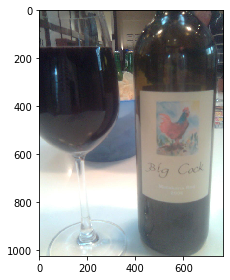

In [9]:
skimage.io.imshow(dataset.load_image(5))

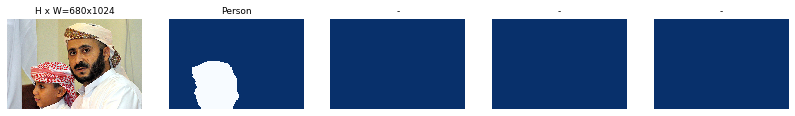

(680, 1024, 3) (680, 1024, 1)


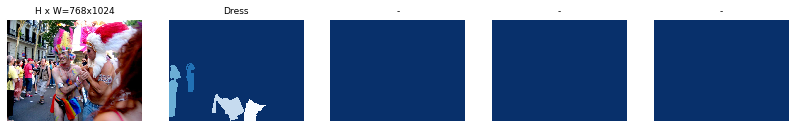

(768, 1024, 3) (768, 1024, 4)


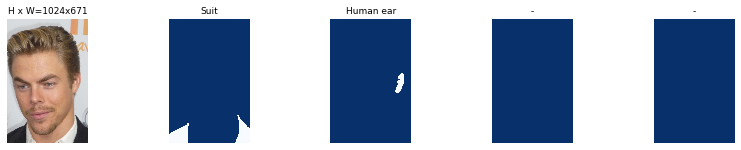

(1024, 671, 3) (1024, 671, 2)


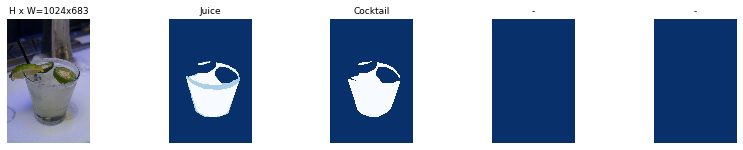

(1024, 683, 3) (1024, 683, 3)


In [10]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
    print(image.shape, mask.shape)

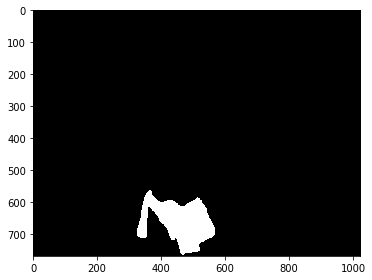

In [11]:
skimage.io.imshow(dataset.load_mask(image_ids[1])[0][:, :, 2])

In [12]:
dataset._annotations['00090f2ef9818205']

[]

image_id  375  (683, 1024, 3) (683, 1024, 1)


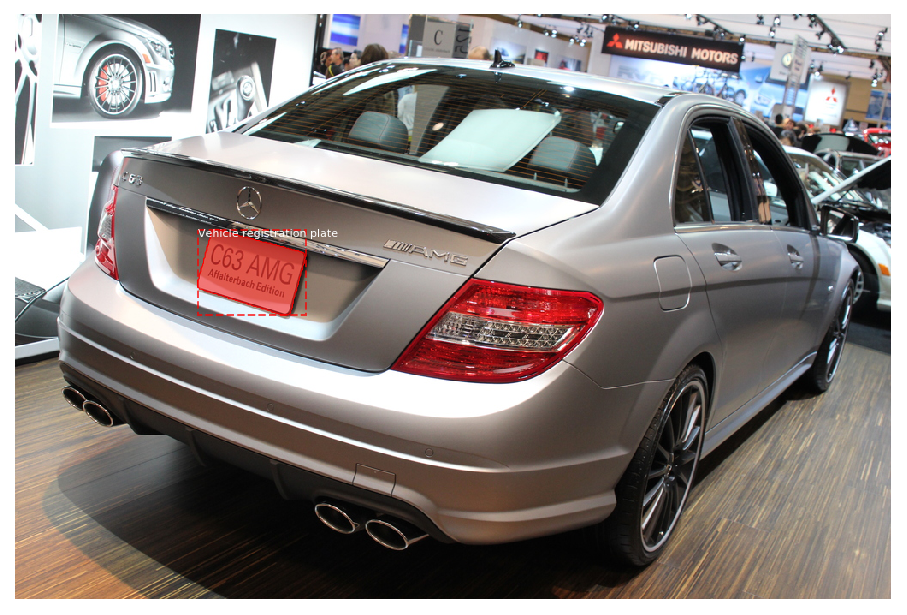

In [13]:
import random
from mrcnn import utils
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
#image = utils.resize(image, mask.shape[:2], preserve_range=True)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id), image.shape, mask.shape)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [14]:
1600/1066.

1.5009380863039399

In [15]:
from mrcnn.config import Config

(1024, 1024, 3)
(1024, 1024, 1)
image_id:  833 
Original shape:  (730, 1024, 3)


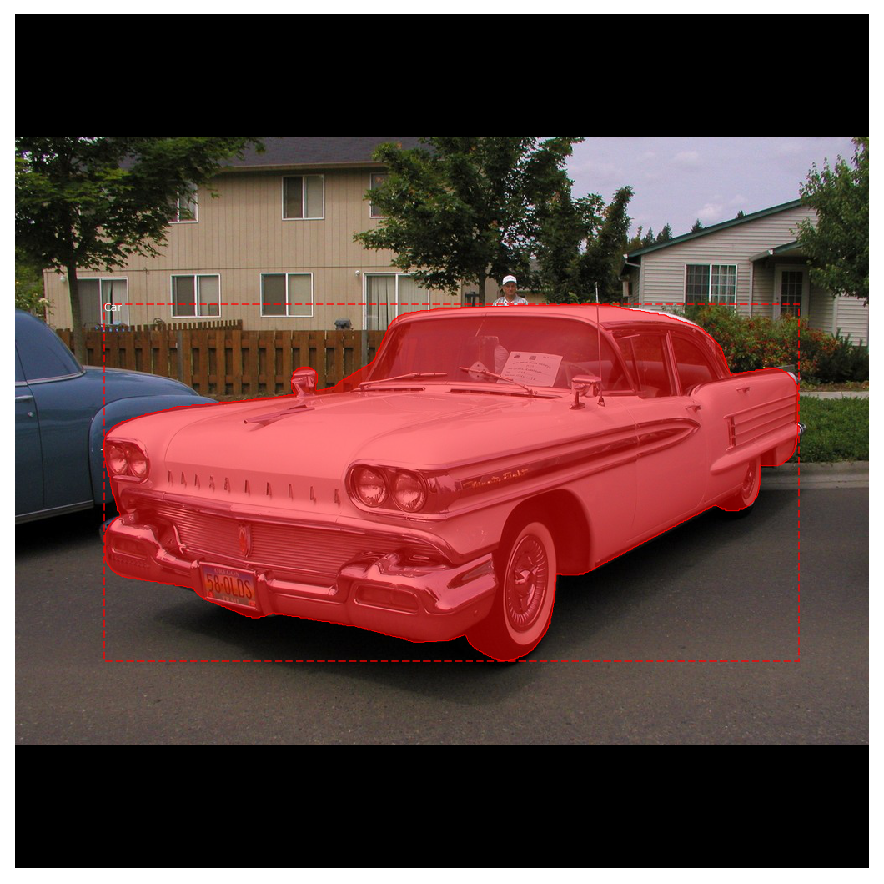

In [16]:

class OpenImageConfig(Config):
    IMAGE_MIN_DIM = 1024
    IMAGE_MAX_DIM = 1024
    
config = OpenImageConfig()

# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
orig_image_width = max(image.shape[:2])
mask, class_ids = dataset.load_mask(image_id)
orig_mask_width = max(mask.shape[:2])
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)

mask = utils.resize_mask(mask, scale, padding)
print(image.shape)
print(mask.shape)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [17]:
len(dataset.class_names)

602